In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
housing = pd.read_csv('housing.csv')

In [4]:
housing=pd.read_csv('housing.csv')


In [5]:
# find the null values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# filling null values
housing.fillna(housing.mean(), inplace=True)

/tmp/ipykernel_18647/798817513.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.fillna(housing.mean(), inplace=True)


In [7]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
feat_out=housing.drop(['ocean_proximity','median_house_value'], axis=1)

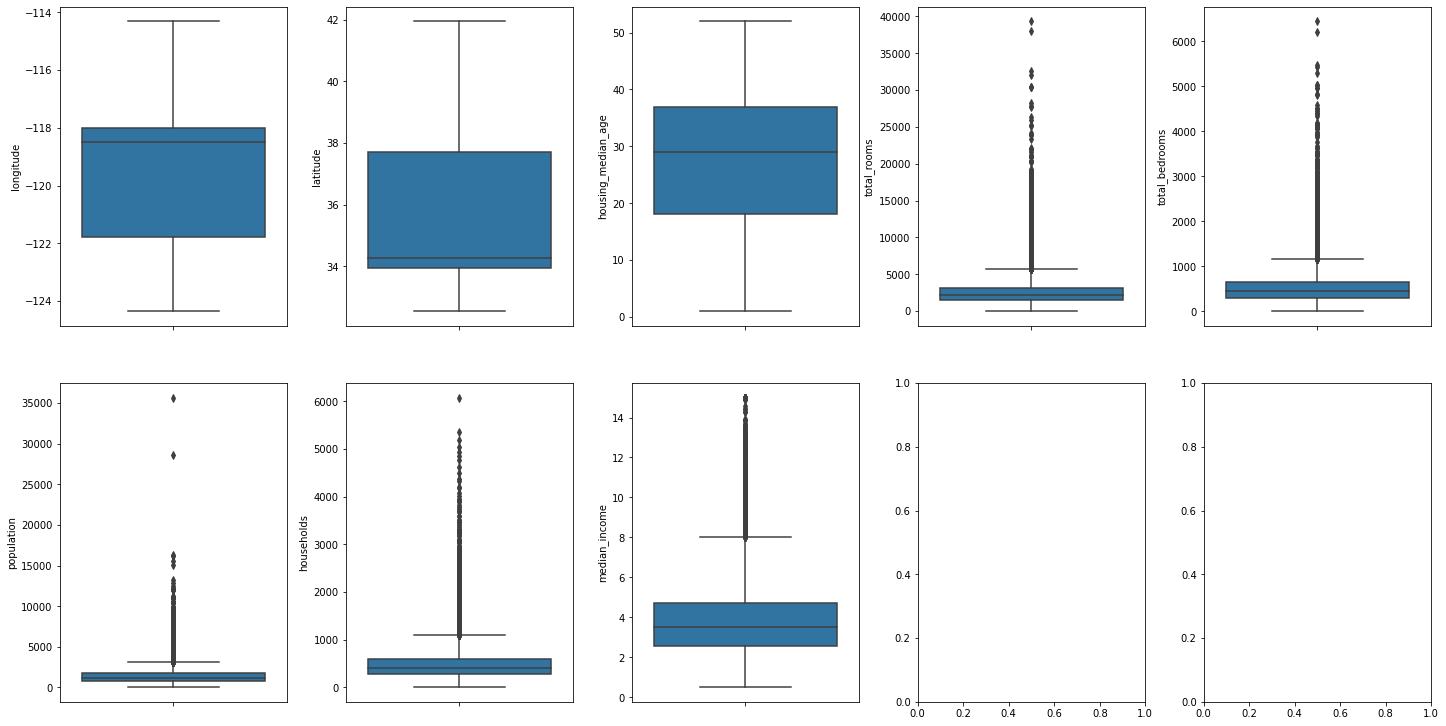

In [10]:
#  showing boxplot for numerical features
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in feat_out.items():
    sns.boxplot(y=k, data=housing, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
feat_out.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


# Finding outliers

In [12]:
for k, v in feat_out.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(feat_out)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column longitude outliers = 0.00%
Column latitude outliers = 0.00%
Column housing_median_age outliers = 0.00%
Column total_rooms outliers = 6.24%
Column total_bedrooms outliers = 6.33%
Column population outliers = 5.80%
Column households outliers = 5.91%
Column median_income outliers = 3.30%


In [13]:
upper_boundary_room= feat_out['total_rooms'].mean() + 1.5*  feat_out['total_rooms'].std()
print(upper_boundary_room)

5908.185958769542


In [14]:
upper_boundary_bedroom= feat_out['total_bedrooms'].mean() + 1.5*  feat_out['total_bedrooms'].std()
print(upper_boundary_bedroom)

1166.7704410258473


In [15]:
upper_boundary_population= feat_out['population'].mean() + 1.5*  feat_out['population'].std()
print(upper_boundary_population)

3124.169926834058


In [16]:
upper_boundary_households= feat_out['households'].mean() + 1.5*  feat_out['households'].std()
print(upper_boundary_households)

1073.0343094799741


In [17]:
upper_boundary_median_income= feat_out['median_income'].mean() + 1.5*  feat_out['median_income'].std()
print(upper_boundary_median_income)

6.72040357982488


# removing outliers

In [18]:
housing = housing[~(housing['total_rooms'] >= upper_boundary_room)]
housing = housing[~(housing['total_bedrooms'] >= upper_boundary_bedroom)]
housing = housing[~(housing['population'] >= upper_boundary_population)]
housing = housing[~(housing['households'] >= upper_boundary_households)]
housing = housing[~(housing['median_income'] >= upper_boundary_median_income)]

In [19]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

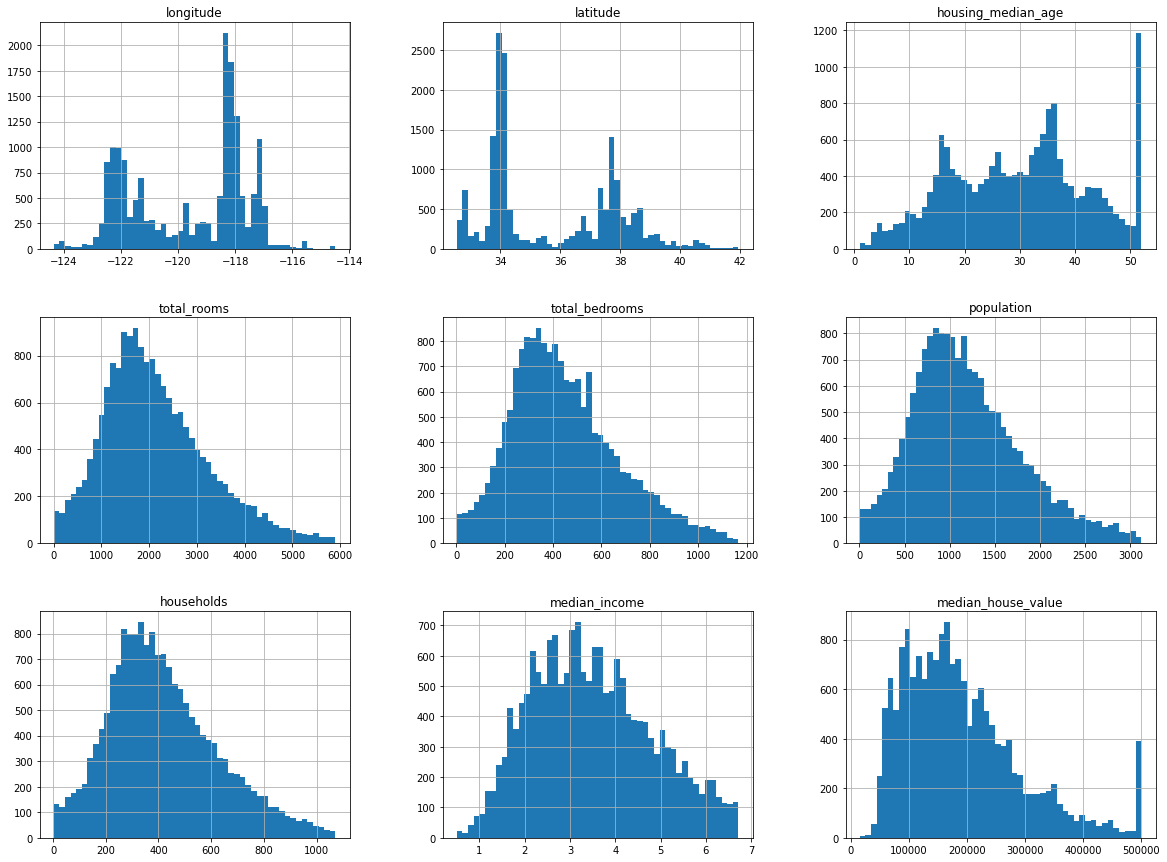

In [20]:
housing.hist(bins=50, figsize=(20,15))


# corrolation

/tmp/ipykernel_18647/109573604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(),annot=True)


<Axes: >

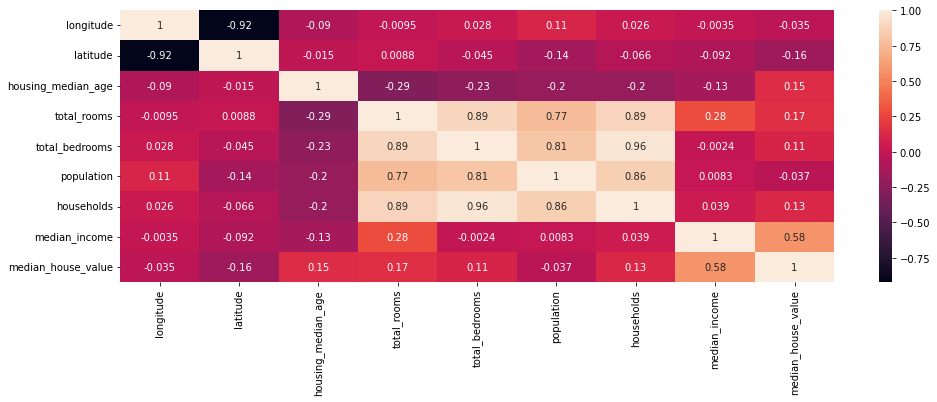

In [21]:
plt.figure(figsize = (16,5))
sns.heatmap(housing.corr(),annot=True)

In [22]:
corr_matrix = housing.corr()

/tmp/ipykernel_18647/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [23]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.922777,-0.090040,-0.009527,0.028457,0.112307,0.025660,-0.003497,-0.035244
latitude,-0.922777,1.000000,-0.014964,0.008802,-0.045309,-0.141226,-0.065575,-0.092468,-0.161533
housing_median_age,-0.090040,-0.014964,1.000000,-0.289568,-0.227146,-0.196024,-0.198884,-0.131585,0.148226
total_rooms,-0.009527,0.008802,-0.289568,1.000000,0.888619,0.765237,0.885438,0.280030,0.165830
total_bedrooms,0.028457,-0.045309,-0.227146,0.888619,1.000000,0.808592,0.964279,-0.002438,0.105779
population,0.112307,-0.141226,-0.196024,0.765237,0.808592,1.000000,0.855781,0.008316,-0.037329
households,0.025660,-0.065575,-0.198884,0.885438,0.964279,0.855781,1.000000,0.039278,0.126164
median_income,-0.003497,-0.092468,-0.131585,0.280030,-0.002438,0.008316,0.039278,1.000000,0.575122
median_house_value,-0.035244,-0.161533,0.148226,0.165830,0.105779,-0.037329,0.126164,0.575122,1.000000


# Splitting data

In [24]:
features=housing.drop(['median_house_value'], axis=1)

In [25]:
target= housing['median_house_value']/1000
target

3        341.3
4        342.2
5        269.7
6        299.2
7        241.4
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: median_house_value, Length: 17549, dtype: float64

In [26]:
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
OH_cols = pd.DataFrame(OH.fit_transform(features[['ocean_proximity']]))

In [27]:
OH_cols.index = features.index
D = features.drop(['ocean_proximity'], axis=1)
col=D.columns

In [28]:
col

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [29]:
D = pd.concat([D, OH_cols], axis=1) 
unique= features['ocean_proximity'].unique()
unique=np.delete(unique,0)
columns= np.append(list(col),unique)
data=D.set_axis(columns, axis=1, copy=False)

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1.0,0.0,0.0,0.0


In [31]:
X_train_full, X_test, y_train_full, y_test = train_test_split(data, target)


In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [33]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
6396,-118.03,34.14,44.0,1446.0,250.0,721.0,243.0,4.7308,1.0,0.0,0.0,0.0
7531,-118.23,33.91,27.0,1694.0,393.0,1890.0,373.0,3.0341,0.0,0.0,0.0,0.0
9806,-121.95,36.61,31.0,1736.0,250.0,497.0,170.0,6.3835,0.0,0.0,0.0,1.0
19202,-122.71,38.43,38.0,1689.0,526.0,1071.0,529.0,1.5026,0.0,0.0,0.0,0.0
11325,-117.96,33.76,22.0,2520.0,556.0,2126.0,527.0,3.7734,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5966,-117.81,34.11,21.0,3481.0,808.0,1866.0,746.0,3.6201,1.0,0.0,0.0,0.0
3994,-118.57,34.17,35.0,2072.0,318.0,908.0,342.0,6.0928,0.0,0.0,0.0,0.0
2579,-124.05,40.85,31.0,2414.0,428.0,1005.0,401.0,3.5156,0.0,0.0,0.0,1.0
8254,-118.17,33.77,45.0,2508.0,797.0,1340.0,720.0,2.6786,0.0,0.0,0.0,1.0


# Scale the data

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Create the model


In [35]:
 np.count_nonzero(np.isnan(X_train))

0

In [36]:
from keras.layers import Dense   
from tensorflow.keras.optimizers import Adam  

In [37]:
# opt_lr = tf.keras.optimizers.Adam(learning_rate=0.01)
def build_clf(learning_rate=0.01, optimizer='Adam', activation='relu', neurons=16, batch_size=32, epochs=10):
  # creating the layers of the NN
  model_lr = tf.keras.models.Sequential()
  model_lr.add(Dense(neurons,input_dim=X_train.shape[1], activation=activation))
  model_lr.add(Dense(neurons, activation=activation))
  model_lr.add(Dense(1))
  model_lr.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=learning_rate), metrics = ['mean_squared_error'])
  return model_lr

In [38]:

checkpoint_filepath = '//home/nast/ckp'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [39]:
param_grid = {'neurons': [16, 32, 64], 
              'batch_size': [32, 64, 128], 
              'epochs': [100, 150], 
              'optimizer': ['Adam', 'sgd'],
              'activation': ['relu', 'tanh'],
              'learning_rate' :[1e-2, 1e-3, 1e-4]}

In [40]:
model = KerasRegressor(build_fn=build_clf, verbose=1)

/tmp/ipykernel_18647/2652361631.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_clf, verbose=1)


In [41]:
gs=GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
history = gs.fit(X_train, y_train, verbose=0, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])

2023-05-05 14:19:45.839366: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:19:46.522657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11313 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:04:00.0, compute capability: 6.0


39/39 [==============================] - 0s 2ms/step - loss: 135.0985 - mean_squared_error: 28543.7949


In [42]:
res=pd.DataFrame(gs.cv_results_)

In [43]:
best_params=gs.best_params_
print("best_params: ", best_params)

best_params:  {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.01, 'neurons': 64, 'optimizer': 'sgd'}


In [44]:
new_params = {key: value for key, value in best_params.items() if key not in ['batch_size', 'epochs']}


In [45]:
neurons = best_params['neurons']
batch_size = best_params['batch_size']
epochs = best_params['epochs']
optimizer = best_params['optimizer']
activation = best_params['activation']
learning_rate = best_params['learning_rate']

In [54]:
final_model = build_clf(**new_params)
hist=final_model.fit(X_train, y_train, epochs=400, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

Epoch 1/400
309/309 [==============================] - 2s 3ms/step - loss: 57.0140 - mean_squared_error: 7497.2207 - val_loss: 43.7456 - val_mean_squared_error: 4043.1829
Epoch 2/400
309/309 [==============================] - 1s 2ms/step - loss: 43.2281 - mean_squared_error: 4069.5132 - val_loss: 41.9482 - val_mean_squared_error: 3679.9277
Epoch 3/400
309/309 [==============================] - 1s 2ms/step - loss: 42.3296 - mean_squared_error: 3956.6047 - val_loss: 43.0195 - val_mean_squared_error: 3774.1648
Epoch 4/400
309/309 [==============================] - 1s 2ms/step - loss: 42.0726 - mean_squared_error: 3914.5239 - val_loss: 41.9733 - val_mean_squared_error: 3711.1252
Epoch 5/400
309/309 [==============================] - 1s 2ms/step - loss: 41.4510 - mean_squared_error: 3804.2776 - val_loss: 40.8869 - val_mean_squared_error: 3719.7280
Epoch 6/400
309/309 [==============================] - 1s 2ms/step - loss: 41.0355 - mean_squared_error: 3746.5786 - val_loss: 40.9199 - val_mean

In [55]:
train_mse = hist.history['mean_squared_error'][-1]
val_mse = hist.history['val_mean_squared_error'][-1]
train_loss = hist.history['loss'][-1]
val_loss = hist.history['val_loss'][-1]

In [56]:
print('Training MSE:', train_mse)
print('Validation MSE:', val_mse)
print('Training loss:', train_loss)
print('Validation loss:', val_loss)

Training MSE: 1779.705810546875
Validation MSE: 2964.69287109375
Training loss: 25.71335792541504
Validation loss: 34.09552764892578


In [57]:
mse_test = final_model.evaluate(X_test, y_test)

138/138 [==============================] - 0s 2ms/step - loss: 33.4660 - mean_squared_error: 2820.6179


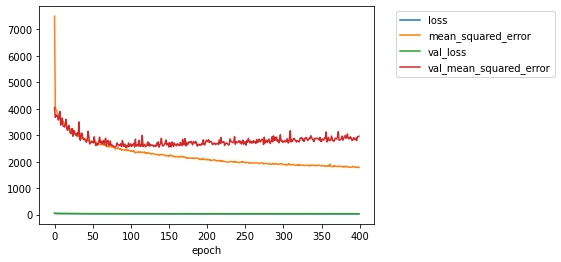

In [58]:
pd.DataFrame(hist.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

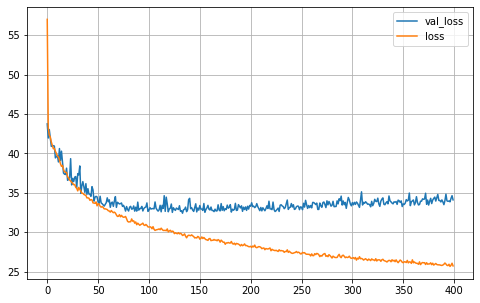

In [59]:
pd.DataFrame(hist.history)[['val_loss', 'loss']].plot(figsize=(8,5))
plt.grid(True)
plt.show()